<a href="https://colab.research.google.com/github/akhil124/Image-Search/blob/main/Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install hyperas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 4.0 MB/s 
     |████████████████████████████████| 1.6 MB 28.1 MB/s 
     |████████████████████████████████| 83 kB 2.4 MB/s 


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [68]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import warnings 
from datetime import datetime

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from keras.models import Sequential

from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

from hyperopt import Trials, STATUS_OK, tpe

from hyperas import optim

from hyperas.distributions import choice, uniform

warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
features=list()
# df =pd.read_csv("drive/My Drive/ColabDrive/MovieData/movies_metadata.csv")
with open("/content/drive/MyDrive/UCI HAR Dataset/features.txt") as f:
    for line in f:
      features.append(line.split()[1])

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt",delim_whitespace=True, header=None, encoding='latin-1')
train_df.columns = features
train_df["subject_id"] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/subject_train.txt", header=None, squeeze=True)
train_df["activity"] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", header=None, squeeze=True)
activity=pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt",header=None,squeeze=True)
label_name=activity.map({1: "WALKING", 2: "WALKING UPSTAIRS", 3:" WALKING DOWNSTAIRS" ,4: "SITTING", 5: "STANDING", 6:"LAYING"} )
train_df['activity_name']=label_name
train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True, header=None, encoding='latin-1')
test_df.columns = features
test_df["subject_id"] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/subject_test.txt", header=None, squeeze=True)
test_df["activity"] = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt", header=None, squeeze=True)
activity=pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt",header=None,squeeze=True)
label_name=activity.map({1: "WALKING", 2: "WALKING UPSTAIRS", 3:" WALKING DOWNSTAIRS" ,4: "SITTING", 5: "STANDING", 6:"LAYING"} )
test_df['activity_name']=label_name
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [ ]:
print("number of NAN in train data: " +str(train_df.isnull().sum().sum()))
print("number of NAN in test data: " +str(test_df.isnull().sum().sum()))

number of NAN in train data: 0
number of NAN in test data: 0


In [ ]:
print("number of duplicates in train data: " +str(sum(train_df.duplicated())))
print("number of duplicates in test data: " +str(sum(test_df.duplicated())))

number of duplicates in train data: 0
number of duplicates in test data: 0


Text(0, 0.5, 'count')

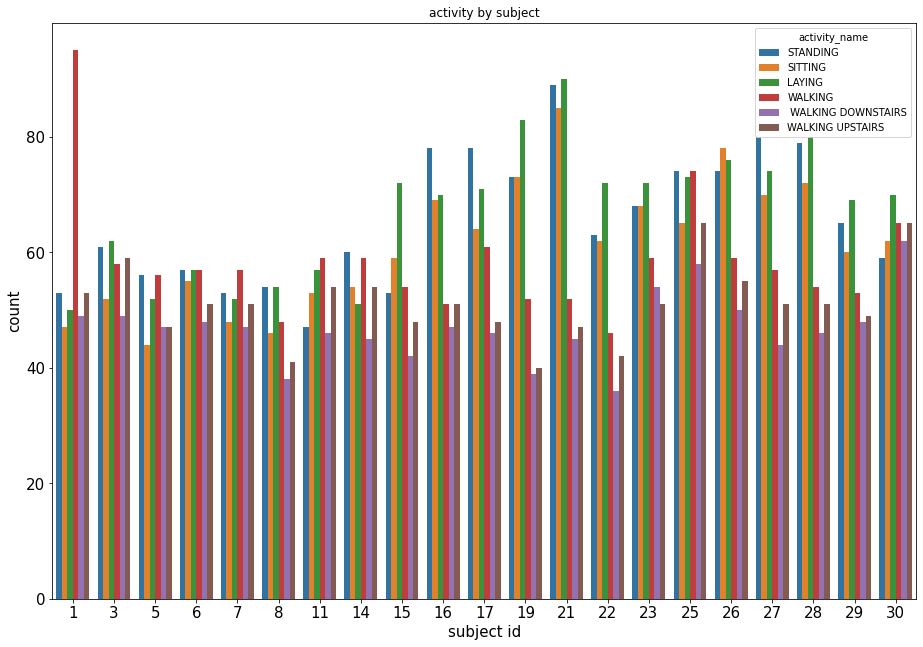

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_axes([0,0,1,1])
ax.set_title("activity by subject")
plt.tick_params(labelsize=15)
sns.countplot(x='subject_id',hue='activity_name',data=train_df)
plt.xlabel('subject id',fontsize=15)
plt.ylabel('count',fontsize=15)

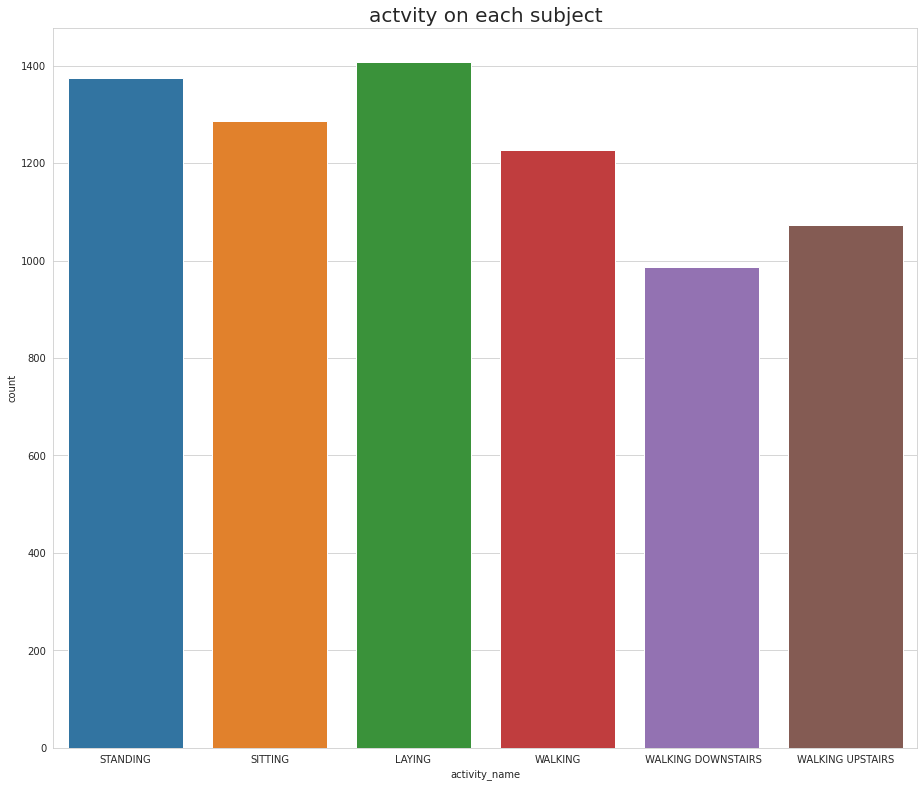

In [88]:
fig=plt.figure(figsize=(12,10))
ax=fig.add_axes([0,0,1,1])
ax.set_title("actvity on each subject",fontsize=20)
sns.color_palette("Spectral", as_cmap=True)
sns.countplot(x='activity_name',data=train_df)

In [ ]:
columns=train_df.columns
columns=columns.str.replace("[()]",'')
columns=columns.str.replace("-",'')
columns=columns.str.replace(",",'')
train_df.columns=columns
test_df.columns=columns

In [ ]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity', 'activity_name'],
      dtype='object', length=564)

In [ ]:
train_df.to_csv("/content/drive/MyDrive/train_df.csv",index=False)
test_df.to_csv("/content/drive/MyDrive/test_df.csv",index=False)

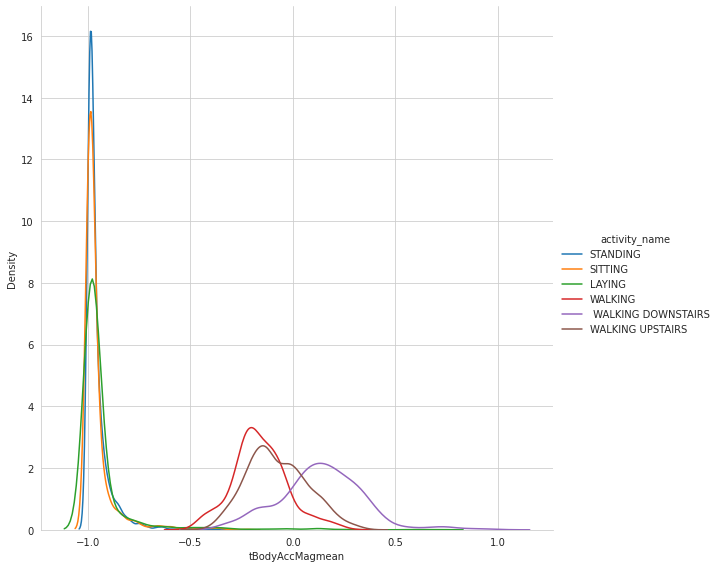

In [93]:
facetgrid = sns.FacetGrid(data=train_df, hue="activity_name", size=8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist=False).add_legend()
plt.show()

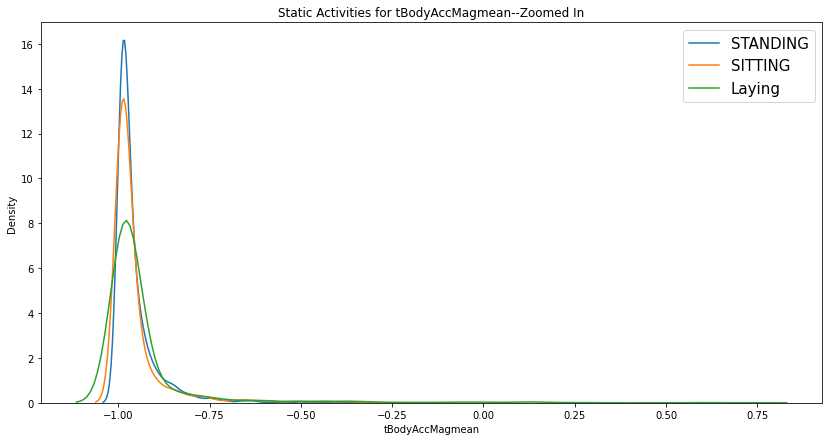

In [ ]:

df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LAYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
axes.set_title("Static Activities for tBodyAccMagmean--Zoomed In")
sns.distplot(df_standing["tBodyAccMagmean"], hist=False, label="STANDING", ax=axes)
sns.distplot(df_sitting["tBodyAccMagmean"], hist=False, label="SITTING", ax=axes)
sns.distplot(df_lying["tBodyAccMagmean"], hist=False, label="Laying", ax=axes)
axes.legend(fontsize=15)
plt.show()

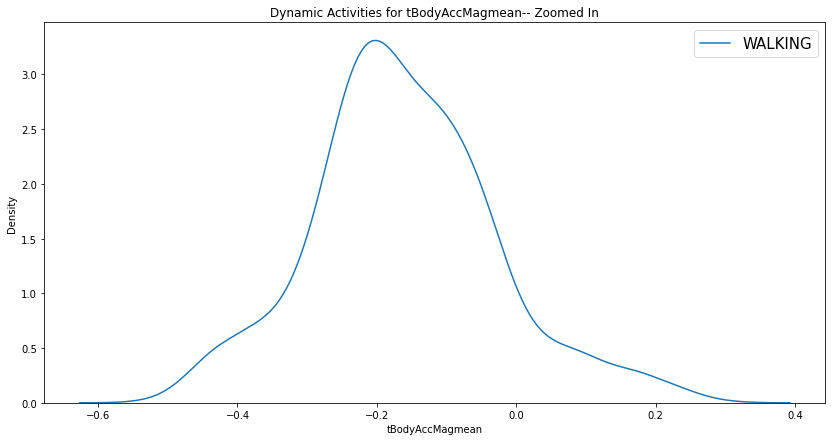

In [ ]:
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LAYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
axes.set_title("Dynamic Activities for tBodyAccMagmean-- Zoomed In")
sns.distplot(df_walking["tBodyAccMagmean"], hist=False, label="WALKING", ax=axes)
sns.distplot(
    df_walking_upstairs["tBodyAccMagmean"],
    hist=False,
    label="WALKING_UPSTAIRS",
    ax=axes,
)
sns.distplot(
    df_walking_downstairs["tBodyAccMagmean"],
    hist=False,
    label="WALKING_DOWNSTAIRS",
    ax=axes,
)
axes.legend(fontsize=15)
plt.show()

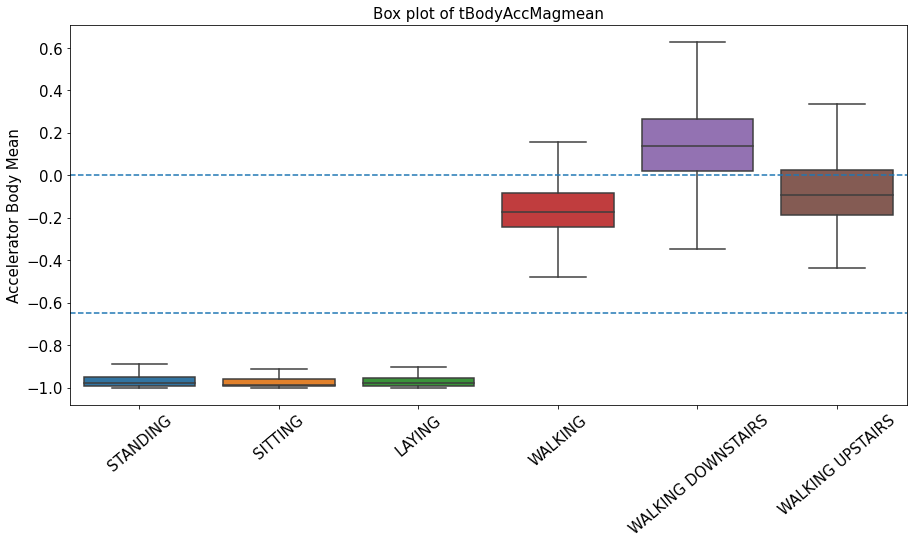

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="activity_name", y="tBodyAccMagmean", showfliers=False, data=train_df)

plt.axhline(y=-0.65, linestyle="--")
plt.axhline(y=0, linestyle="--")
plt.title("Box plot of tBodyAccMagmean", fontsize=15)
plt.ylabel("Accelerator Body Mean", fontsize=15)
plt.xlabel("Activity Name", fontsize=15)
plt.xlabel("")
plt.tick_params(labelsize=15)
plt.xticks(rotation=40)
plt.show()


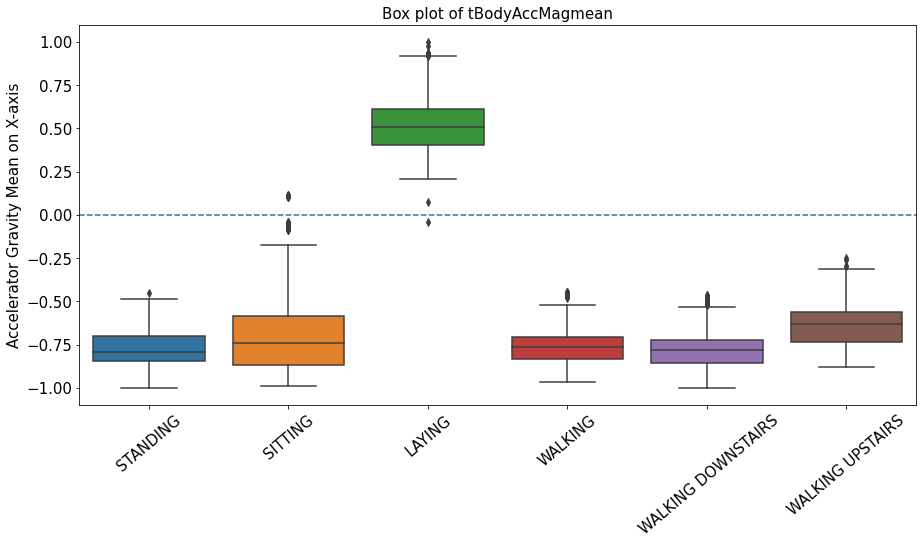

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="activity_name", y="angleXgravityMean", showfliers=True, data=train_df)
plt.axhline(y=0, linestyle="--")
plt.title("Box plot of tBodyAccMagmean", fontsize=15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize=15)
plt.xlabel("")
plt.tick_params(labelsize=15)
plt.xticks(rotation=40)
plt.show()


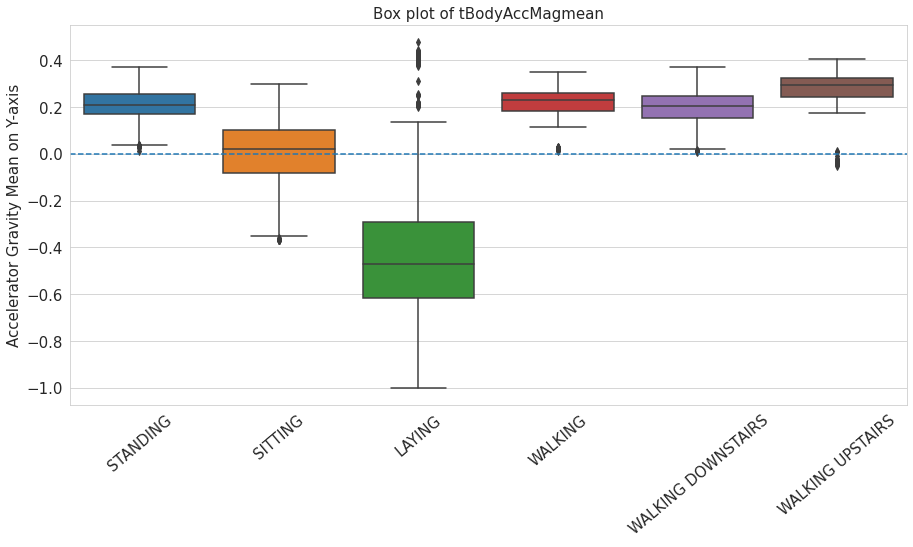

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="activity_name", y="angleYgravityMean", showfliers=True, data=train_df)
plt.axhline(y=0, linestyle="--")
plt.title("Box plot of tBodyAccMagmean", fontsize=15)
plt.ylabel("Accelerator Gravity Mean on Y-axis", fontsize=15)
plt.xlabel("")
plt.tick_params(labelsize=15)
plt.xticks(rotation=40)
plt.show()


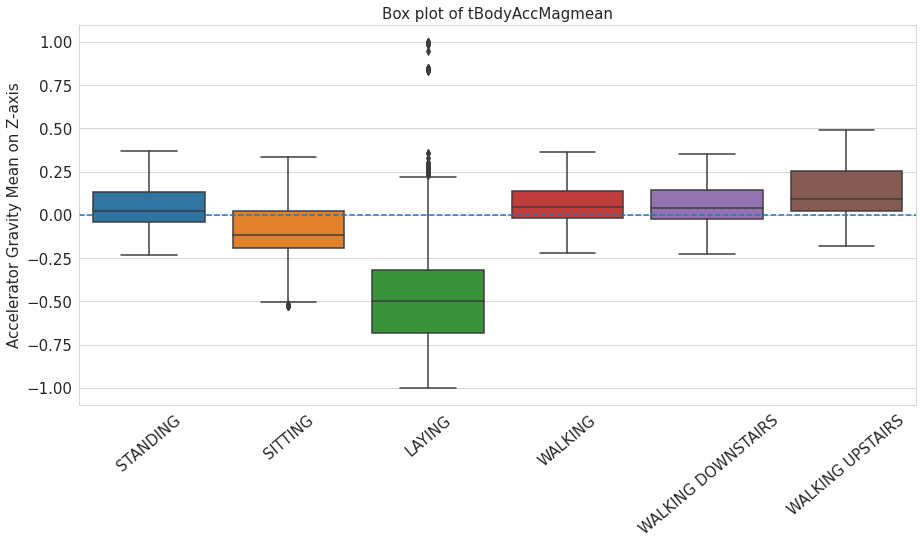

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="activity_name", y="angleZgravityMean", showfliers=True, data=train_df)
plt.axhline(y=0, linestyle="--")
plt.title("Box plot of tBodyAccMagmean", fontsize=15)
plt.ylabel("Accelerator Gravity Mean on Z-axis", fontsize=15)
plt.xlabel("")
plt.tick_params(labelsize=15)
plt.xticks(rotation=40)
plt.show()


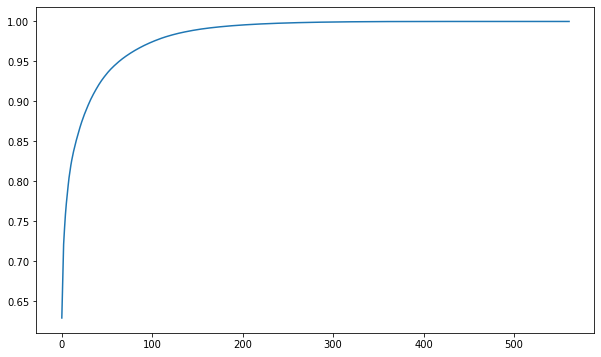

In [ ]:
from sklearn.decomposition import PCA
pre_pca = PCA()
pre_pca_obj=pre_pca.fit(train_df.drop(['activity_name','subject_id'],axis=1))
pre_pca_obj.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pre_pca_obj.explained_variance_ratio_))

In [90]:
pca = PCA(0.90)
data_set_pca = pca.fit_transform(train_df.drop(['activity_name','subject_id'],axis=1))
data_set_pca.shape

(7352, 32)

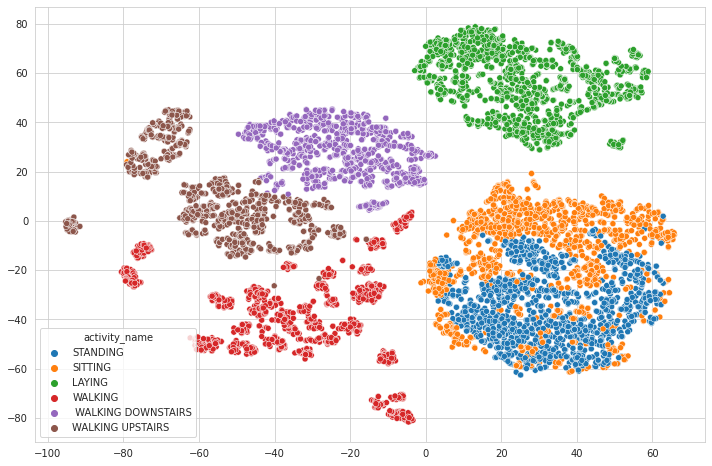

In [89]:
from sklearn.manifold import TSNE
pca = PCA(0.90)
data_set_pca = pca.fit_transform(train_df.drop(['activity_name','subject_id'],axis=1))
data_set_pca
tsne = TSNE()
data_set_pca_tsne = tsne.fit_transform(data_set_pca)
plt.figure(figsize=(12,8))
sns.scatterplot(x=data_set_pca_tsne[:,0],y=data_set_pca_tsne[:,1],hue=train_df['activity_name'])

In [66]:
def plt_tsne(perplexity, train_df):
    data = train_df.drop(["subject_id", "activity", "activity_name"], axis=1)

    data_label = train_df["activity_name"]
    applying_tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=1000, verbose=2)
    reduced_dim = applying_tsne.fit_transform(data)
    d = {
        "Dimension_1": applying_tsne.embedding_[:, 0],
        "Dimension_2": applying_tsne.embedding_[:, 1],
        "activities": data_label,
    }
    df = pd.DataFrame(data=d)
    print("Done...")
    print("Plotting TSNE Visualization...")
    sns.set_style("whitegrid")
    sns.lmplot(
        "Dimension_1",
        "Dimension_2",
        df,
        hue="activities",
        markers=["|", "o", "_", ">", "<", "^"],
        fit_reg=False,
    )
    plt.title("TSNE Plot for Perplexity " + str(perplexity))
    plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 3.549s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.239s
[t-SNE] Iteration 50: error = 114.0867615, gradient norm = 0.0209903 (50 iterations in 4.318s)
[t-SNE] Iteration 100: error = 97.7997589, gradient norm = 0.0172296 (50 iterations in 2.534s)
[t-SNE] Iteration 150: error = 93.3102264, gradient norm = 

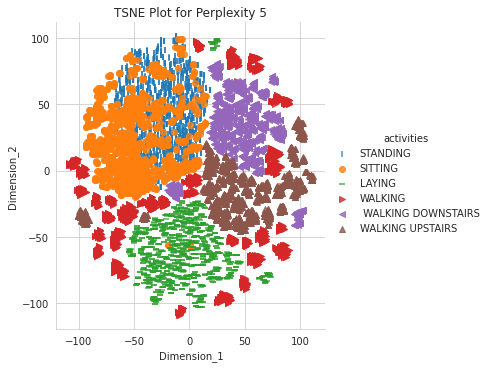

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 2.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.257s
[t-SNE] Iteration 50: error = 105.6457825, gradient norm = 0.0232720 (50 iterations in 6.074s)
[t-SNE] Iteration 100: error = 90.5888748, gradient norm = 0.0115773 (50 iterations in 2.618s)
[t-SNE] Iteration 150: error = 87.3834839, gradient norm = 

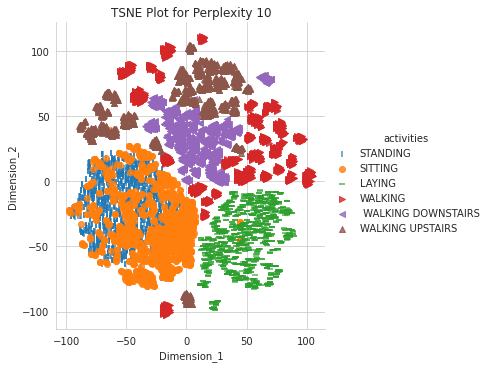

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 2.308s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.399086
[t-SNE] Computed conditional probabilities in 0.435s
[t-SNE] Iteration 50: error = 88.3191376, gradient norm = 0.0299776 (50 iterations in 4.766s)
[t-SNE] Iteration 100: error = 78.0984802, gradient norm = 0.0046258 (50 iterations in 3.414s)
[t-SNE] Iteration 150: error = 76.6397705, gradient norm = 

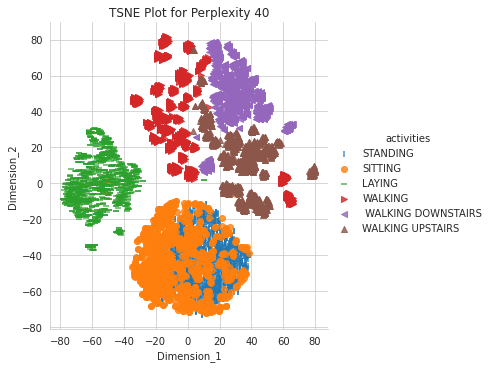

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 2.513s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.559265
[t-SNE] Computed conditional probabilities in 1.113s
[t-SNE] Iteration 50: error = 76.6768951, gradient norm = 0.0319575 (50 iterations in 6.844s)
[t-SNE] Iteration 100: error = 68.6069565, gradient norm = 0.0037653 (50 iterations in 8.526s)
[t-SNE] Iteration 150: error = 68.0254669, gradient norm = 

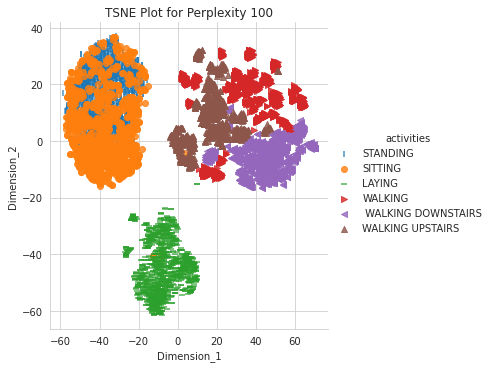

In [67]:
perplexities = [5, 10, 40, 100]
for perplexity in perplexities:
  plt_tsne(perplexity, train_df)

In [73]:
label = train_df['activity_name']

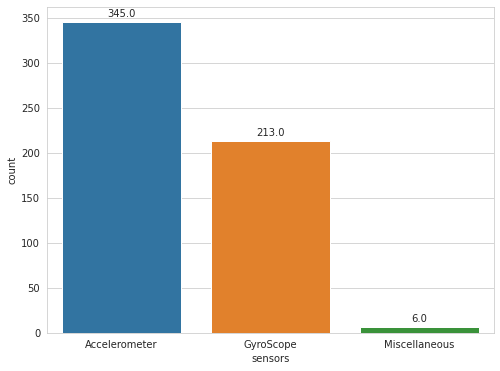

In [94]:
Accel = []
Gyro = []
Misc = []

for i in train_df.columns:
    if "Acc" in i:
        Accel.append(i)
    elif "Gyro" in i:
        Gyro.append(i)
    else :
        Misc.append(i)

dat_sens = pd.DataFrame({'sensors':['Accelerometer','GyroScope','Miscellaneous'],'count':[len(Accel),len(Gyro),len(Misc)]})
plt.figure(figsize=(8,6))
splot=sns.barplot(x='sensors',y='count',data=dat_sens);
for p in splot.patches:
    splot.annotate(format(p.get_height(),'.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [77]:
data_set_walk = train_df[label=='STANDING'].drop(['activity_name'],axis=1).copy()
print(data_set_walk.shape)
data_set_subject = data_set_walk.pop('subject_id')


(1374, 563)


In [78]:
scaled_data = StandardScaler()
scaled_walk_data=scaled_data.fit_transform(data_set_walk)

lbl = LabelEncoder()
lbl_encoded_subject = lbl.fit_transform(data_set_subject)

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_walk_data,lbl_encoded_subject,random_state=3)


dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,Y_train)

features = train_df.drop(['activity_name','subject_id'],axis=1).columns
importances = dt_model.feature_importances_

data = {'Gyroscope':0,'Accelerometer':0}

for feature, importance in zip(features, importances):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer'] += importance

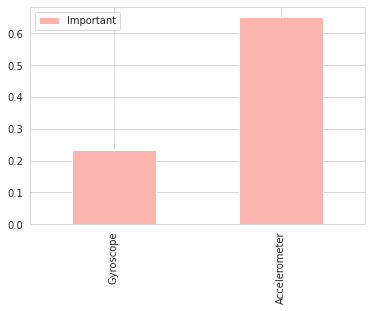

In [82]:
dat_dict = pd.DataFrame.from_dict(data,orient='index')
dat_dict.rename(columns={0:'Important'},inplace=True)
dat_dict.plot(kind='bar',colormap='Pastel1')

In [83]:
data_set_walk = train_df[label=='WALKING UPSTAIRS'].drop(['activity_name'],axis=1).copy()
print(data_set_walk.shape)
data_set_subject = data_set_walk.pop('subject_id')
scaled_data = StandardScaler()
scaled_walk_data=scaled_data.fit_transform(data_set_walk)

lbl = LabelEncoder()
lbl_encoded_subject = lbl.fit_transform(data_set_subject)
X_train,X_test,Y_train,Y_test = train_test_split(scaled_walk_data,lbl_encoded_subject,random_state=3)


dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,Y_train)

features = train_df.drop(['activity_name','subject_id'],axis=1).columns
importances = dt_model.feature_importances_
data = {'Gyroscope':0,'Accelerometer':0}
for feature, importance in zip(features, importances):
    if 'Gyro' in feature:
        data['Gyroscope'] += importance
    if 'Acc' in feature:
        data['Accelerometer'] += importance

(1073, 563)


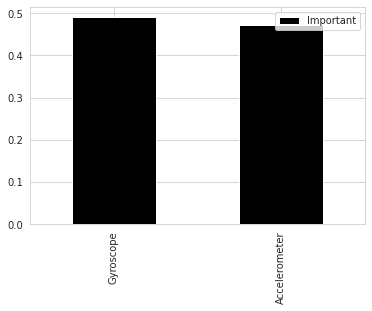

In [92]:
dat_dict = pd.DataFrame.from_dict(data,orient='index')
dat_dict.rename(columns={0:'Important'},inplace=True)
dat_dict.plot(kind='bar',colormap='gray')